## Introduction

### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pylab import rcParams
import datetime as dt
import os

%matplotlib inline
rcParams['figure.figsize'] = 25, 15
os.getcwd()

'/home/jovyan/work/Projects/porttalbot/codes'

### Importing files

In [2]:
df = pd.read_csv(r'/home/jovyan/work/Projects/porttalbot/spreadsheets/datafile_new.csv')
df.fillna(value=0, inplace=True)
df['JobDate'] = pd.to_datetime(df['JobDate']).dt.date
display(df.head(5))

JobID1       JobID2         CleanJobTitle  \
0  784397514  784397514.0  Supply Chain Manager   
1  784397514  784397514.0  Supply Chain Manager   
2  784397514  784397514.0  Supply Chain Manager   
3  784397514  784397514.0  Supply Chain Manager   
4  784397514  784397514.0  Supply Chain Manager   

                                             JobText  \
0  Supply Chain Manager  Recruiter     Hunter Sel...   
1  Supply Chain Manager  Recruiter     Hunter Sel...   
2  Supply Chain Manager  Recruiter     Hunter Sel...   
3  Supply Chain Manager  Recruiter     Hunter Sel...   
4  Supply Chain Manager  Recruiter     Hunter Sel...   

                      CanonSkillName CanonCity CanonCounty     TTWA  \
0                         Accounting   Swansea     Swansea  Swansea   
1                          Budgeting   Swansea     Swansea  Swansea   
2                         Creativity   Swansea     Swansea  Swansea   
3  Key Performance Indicators (KPIs)   Swansea     Swansea  Swansea   
4                          Logistics   Swansea     Swansea  Swansea   

   MinAnnualSalary  MaxAnnualSalary  MinExperience  MaxExperience     JobDate  
0          45000.0          55000.0            0.0            0.0  2019-12-31  
1          45000.0          55000.0            0.0            0.0  2019-12-31  
2          45000.0          55000.0            0.0            0.0  2019-12-31  
3          45000.0          55000.0            0.0            0.0  2019-12-31  
4          45000.0          55000.0            0.0            0.0  2019-12-31

## Port Talbot

In [3]:
Port_Talbot = df[(df['CanonCity'] == 'Port Talbot') | (df['CanonCity'] == 'Talbot') | (df['CanonCity'] == 'PORT TALBOT')]
display(Port_Talbot.head(5))

JobID1       JobID2            CleanJobTitle  \
41  784364237  784364237.0        Assistant Manager   
55  784385938  784385938.0  Security Officer Retail   
56  784385938  784385938.0  Security Officer Retail   
57  784385938  784385938.0  Security Officer Retail   
58  784385938  784385938.0  Security Officer Retail   

                                              JobText  \
41  # Assistant Manager - Port Talbot  **Assistant...   
55  Security Officer (Retail)  Job detailsPosting ...   
56  Security Officer (Retail)  Job detailsPosting ...   
57  Security Officer (Retail)  Job detailsPosting ...   
58  Security Officer (Retail)  Job detailsPosting ...   

                 CanonSkillName    CanonCity        CanonCounty     TTWA  \
41             Store Management  Port Talbot  Neath Port Talbot  Swansea   
55         Communication Skills  Port Talbot  Neath Port Talbot  Swansea   
56             Customer Service  Port Talbot  Neath Port Talbot  Swansea   
57  Verbal / Oral Communication  Port Talbot  Neath Port Talbot  Swansea   
58                      Writing  Port Talbot  Neath Port Talbot  Swansea   

    MinAnnualSalary  MaxAnnualSalary  MinExperience  MaxExperience     JobDate  
41          20000.0          20000.0            0.0            0.0  2019-12-30  
55          17576.0          17576.0            0.0            0.0  2019-12-30  
56          17576.0          17576.0            0.0            0.0  2019-12-30  
57          17576.0          17576.0            0.0            0.0  2019-12-30  
58          17576.0          17576.0            0.0            0.0  2019-12-30

#### Top 20 skills

In [4]:
Port_Talbot_2014 = Port_Talbot[pd.DatetimeIndex(Port_Talbot['JobDate']).year == 2014]
Port_Talbot_piv_2014 = pd.pivot_table(data=Port_Talbot_2014, values='JobID1', index='CanonSkillName', aggfunc=lambda x: len(x.unique()))
Port_Talbot_piv_2014 = Port_Talbot_piv_2014[Port_Talbot_piv_2014.index != 0]

Port_Talbot_2019 = Port_Talbot[pd.DatetimeIndex(Port_Talbot['JobDate']).year == 2019]
Port_Talbot_piv_2019 = pd.pivot_table(data=Port_Talbot_2019, values='JobID1', index='CanonSkillName', aggfunc=lambda x: len(x.unique()))
Port_Talbot_piv_2019 = Port_Talbot_piv_2019[Port_Talbot_piv_2019.index != 0]

Port_Talbot_piv_2019.columns = ['count']
Port_Talbot_piv_2019['share_in_percent'] = (np.round(Port_Talbot_piv_2019['count']/np.sum(Port_Talbot_piv_2019['count']), 4)*100)
display(Port_Talbot_piv_2019.head(5))

count  share_in_percent
CanonSkillName                                                    
.NET                                           9              0.11
3D Modelling / Design                          2              0.02
3D Printing / Additive Manufacturing (AM)      1              0.01
AC/DC Drives and Motors                        4              0.05
API Management                                 1              0.01

Text(0.5, 1.0, 'Top 20 skills by share (%): 2019')

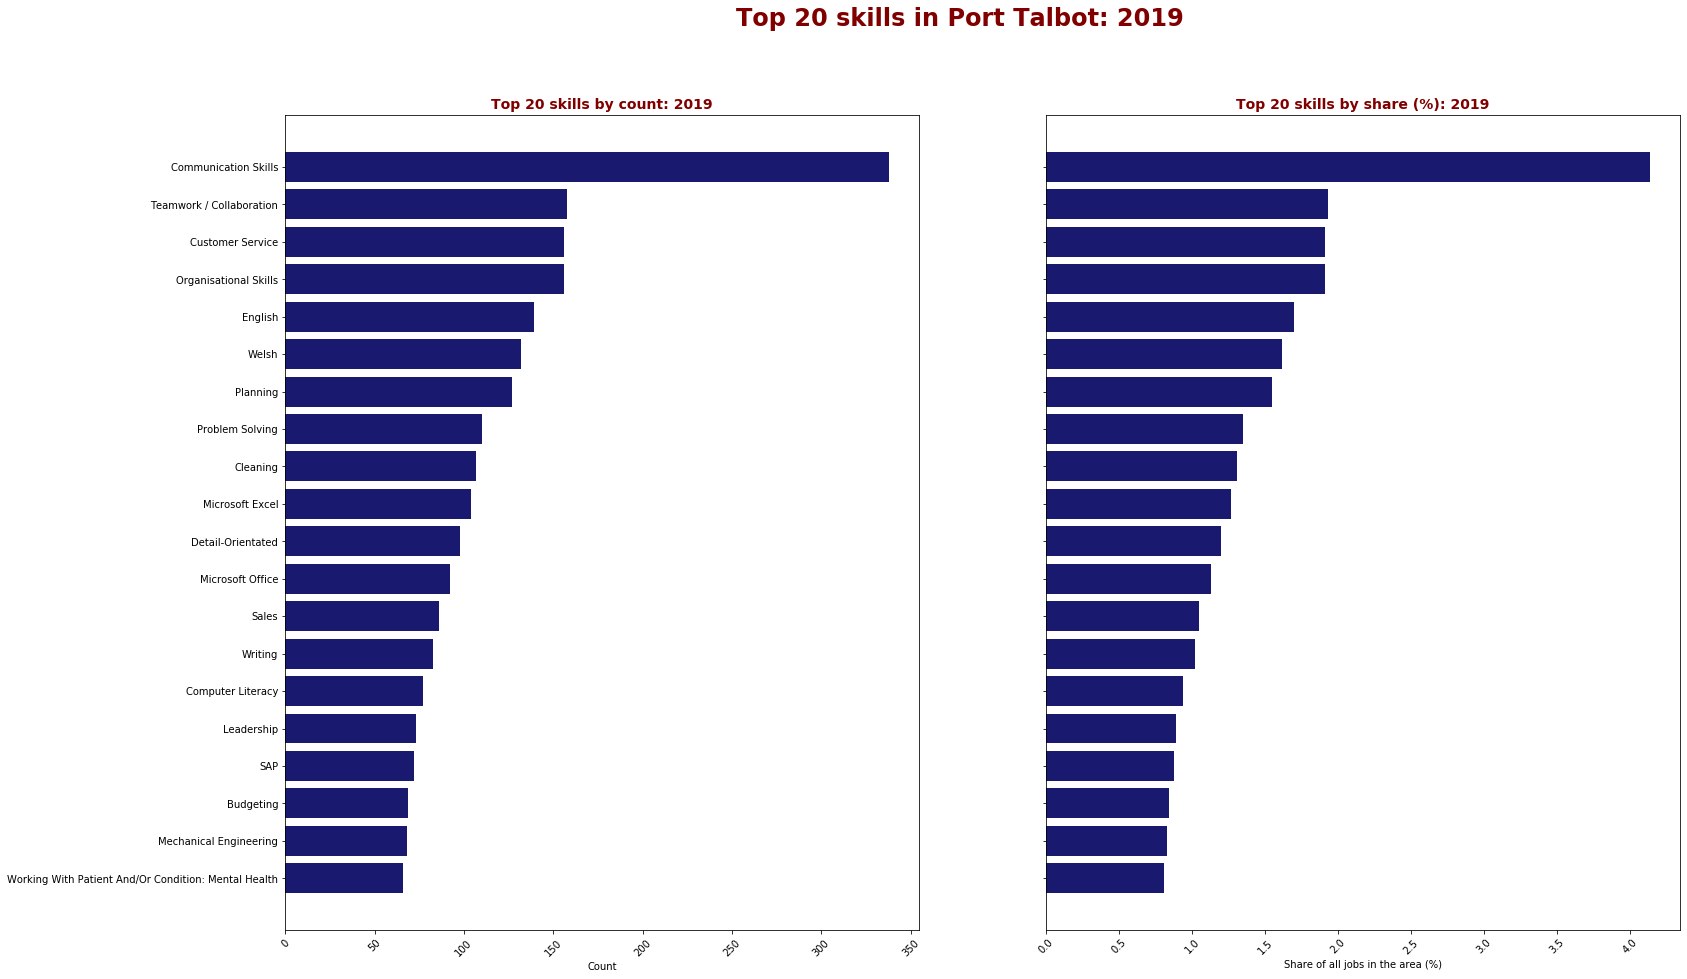

In [5]:
Port_Talbot_Top_20_2019_by_count = Port_Talbot_piv_2019.nlargest(20, 'count').sort_values(by='count', axis=0, ascending=True)
Port_Talbot_Top_20_2019_by_share = Port_Talbot_piv_2019.nlargest(20, 'share_in_percent').sort_values(by='share_in_percent', axis=0, ascending=True)

fig , (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.suptitle('Top 20 skills in Port Talbot: 2019', fontsize = 24, fontweight='bold', color='maroon')

ax1.barh(Port_Talbot_Top_20_2019_by_count.index, Port_Talbot_Top_20_2019_by_count['count'], color='midnightblue')
ax1.set_xlabel('Count')
plt.setp(ax1.get_xticklabels(), rotation=45)
ax1.set_title('Top 20 skills by count: 2019', fontsize=14, fontweight='bold', color='maroon')

ax2.barh(Port_Talbot_Top_20_2019_by_share.index, Port_Talbot_Top_20_2019_by_share['share_in_percent'], color='midnightblue')
ax2.set_xlabel('Share of all jobs in the area (%)')
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.set_title('Top 20 skills by share (%): 2019', fontsize=14, fontweight='bold', color='maroon')

#### Top 20 skills' change in demand

In [6]:
Port_Talbot_combined = pd.concat([Port_Talbot_piv_2014, Port_Talbot_piv_2019['count']], axis=1)
Port_Talbot_combined.columns = ['Jobs2014', 'Jobs2019']
Port_Talbot_combined['PercentChange'] = np.round(((Port_Talbot_combined['Jobs2019']-Port_Talbot_combined['Jobs2014'])/Port_Talbot_combined['Jobs2014'])*100, 2)
Port_Talbot_combined.dropna(subset=['PercentChange'], inplace=True)
Port_Talbot_combined.sort_values(by='PercentChange', inplace=True, ascending=False)
display(Port_Talbot_combined)

Jobs2014  Jobs2019  PercentChange
Autism Diagnosis / Treatment / Care       1.0      31.0        3000.00
Training Programmes                       1.0      23.0        2200.00
Negotiation Skills                        1.0      14.0        1300.00
Web Application Development               1.0      14.0        1300.00
Technical Drawings                        2.0      27.0        1250.00
...                                       ...       ...            ...
Prospective Clients                      17.0       2.0         -88.24
Variance Analysis                        26.0       3.0         -88.46
Manufacturing Industry Knowledge          9.0       1.0         -88.89
Financial Transactions                   24.0       2.0         -91.67
German                                   18.0       1.0         -94.44

[507 rows x 3 columns]

In [7]:
Port_Talbot_Top_20_unadjusted_change_2019 = Port_Talbot_combined.nlargest(20, 'PercentChange').sort_values(by='PercentChange', axis=0, ascending=True)
Port_Talbot_Top_20_adjusted_change_2019 = Port_Talbot_combined[Port_Talbot_combined['Jobs2019']>=100.00].nlargest(20, 'PercentChange').sort_values(by='PercentChange', axis=0, ascending=True)

fig , (ax1, ax2) = plt.subplots(1, 2, sharey=False)
plt.suptitle('Top 20 change in skills in Port Talbot: 2014-2019', fontsize = 24, fontweight='bold', color='maroon')

ax1.barh(Port_Talbot_Top_20_unadjusted_change_2019.index, Port_Talbot_Top_20_unadjusted_change_2019['PercentChange'], color='midnightblue')
plt.setp(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel('Count')
ax1.set_title('Top 20 skills by percentage change (unadjusted): 2014-19', fontsize=14, fontweight='bold', color='maroon')

ax2.barh(Port_Talbot_Top_20_adjusted_change_2019.index, Port_Talbot_Top_20_adjusted_change_2019['PercentChange'], color='midnightblue')
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.set_xlabel('Count')
ax2.set_title('Top 20 skills by percentage change (adjusted for min.100 jobs in 2019): 2014-19', fontsize=14, fontweight='bold', color='maroon')

plt.show()